# Project 1
**Author: Rahul Ravi VK**  
**Course: ENPM673**

---

## Installing Required Library

Since we are downloading the video from Google Drive, we need the **gdown** library to handle Google Drive downloads.




In [31]:
!pip install -q gdown
import gdown

## We will import other required libraries

In [32]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os


## Importing and Downloading the Video from Google Drive

First, we will upload the video file **"yellow_ball_up_and_down.mp4"** to our personal Google Drive. After uploading the file, we generate a shareable link by enabling access to **"Anyone with the link" → Viewer**.

From the generated Google Drive link, we extract the **File ID**.  

For example:

Actual share link:
https://drive.google.com/file/d/FILE_ID/view?usp=sharing

The `FILE_ID` portion of the link is what we need.

We then construct a downloadable URL using the format:

https://drive.google.com/uc?id=FILE_ID

This allows the file to be downloaded programmatically.

In [33]:
# Google Drive direct download link
url = "https://drive.google.com/uc?id=1Li1NvnNyGH73nj8_a6plB1gTRjJHVVpS"
URL_actual = "https://drive.google.com/file/d/1Li1NvnNyGH73nj8_a6plB1gTRjJHVVpS/view?usp=sharing"

# Save as video file
save_path = "video.mp4"

# Download video
gdown.download(url, save_path, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1Li1NvnNyGH73nj8_a6plB1gTRjJHVVpS
To: /content/video.mp4
100%|██████████| 285k/285k [00:00<00:00, 42.6MB/s]


'video.mp4'

## Reading Video Frames and Storing Them

First, we create an empty list named `frames` where we will store each frame of the video.

Next, we initialize a video capture object using OpenCV and store it in the variable `capture`. This allows us to access the video file frame by frame.

Using the `read()` function inside a loop, we read each frame sequentially. The `read()` function returns two values:
- `ret` → A boolean indicating whether the frame was successfully read stored in `isTrue`
- `frame` → The actual frame image.

As long as `ret` is `True`, we append the frame to the `frames` list. This process continues until all frames in the video are read.


In [34]:
# capture the frames
capture = cv.VideoCapture(save_path)
frames = []

while True:
    isTrue, frame = capture.read()

    if not isTrue:
        break   # Stop when video ends

    # cv2_imshow(frame)
    frames.append(frame)

print("Total frames:", len(frames))



Total frames: 383


## Defining a range of yellow color in HSV space.
HSV =

H → Hue (color type)

S → Saturation (color intensity)

V → Value (brightness)

In [35]:
lower_yellow = np.array([20, 95, 95])
upper_yellow = np.array([40, 255, 255])


## First of all we Initialize a lists
*   yellow_balls : to store the converted frames
*   frame_center_yellow_x = [] : this will contain the centre position of yellow ball x cordinate calculated during each loop
*   frame_center_yellow_y = [] : this will contain the centre position of yellow ball y cordinate calculated during each loop
## Now we will loop over all the frames from 191 to 292


*   here we will select each frame during the loop using frame variable and we will also initialize a empty lists pixel_x and pixel_y which will store all the pixel positions that are yellow.

*   To identify colors HSV format is the best therefore we convert the BGR format to HSV.

*   Then we will create mask using the stored hsv image and the desired lower and upper range created for finding yellow colour. mask is simply the frame with only white and black pixels containing. White pixels representing the yellow colour.

*   We will do a bitwise operation of frame using the mask. This will keep frame pixels black when there is no yellow and and keep the yellow pixels as it is as per desired range.

*   The resultant frame containing only yellow color namely "yellow_ball" is stored in the lists "yellow_balls".

*   Now each pixel of "yellow_ball" is checked using the for loop. This is done to identify all yellow pixel positions. The pixel positions are stored in pixel_x and pixel_y.

*   Now we will sort it and calculate the median to identify the centre.

In [36]:
#variable declaration
yellow_balls=[]
frame_center_yellow_x = []
frame_center_yellow_y = []

# outer loop: Loop over each frame to mask and find the yellow ball
for i in range(191,293):
    frame = frames[i]
    pixel_x = []
    pixel_y = []

    # Convert to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # Create mask for yellow
    mask = cv.inRange(hsv, lower_yellow, upper_yellow)

    # Extract only yellow pixels
    yellow_ball = cv.bitwise_and(frame, frame, mask=mask)
    yellow_balls.append(yellow_ball)

    # Inner Loop on masked image frame "yellow_ball"...
    #    .....to store pixel positon of yellow balls by looping over all pixels

    for y in range(yellow_ball.shape[0]):
        for x in range(yellow_ball.shape[1]):
            if not np.array_equal(yellow_ball[y, x], [0,0,0]):
                pixel_x.append(x)
                pixel_y.append(y)
    pixel_x.sort()
    pixel_y.sort()

    # condition to check if yellow ball was detected....
    # .....then move on to find centre in x and y

    if len(pixel_x) > 0 and len(pixel_y) > 0:
        center_x = int(np.median(pixel_x))
        center_y = int(np.median(pixel_y))

        frame_center_yellow_x.append(center_x)
        frame_center_yellow_y.append(center_y)

        print(f"Frame {i}: Yellow ball center at ({center_x}, {center_y})")
    else:
        print(f"Frame {i}: No yellow ball detected")



Frame 191: Yellow ball center at (245, 190)
Frame 192: Yellow ball center at (245, 186)
Frame 193: Yellow ball center at (245, 181)
Frame 194: Yellow ball center at (245, 177)
Frame 195: Yellow ball center at (245, 173)
Frame 196: Yellow ball center at (245, 169)
Frame 197: Yellow ball center at (245, 165)
Frame 198: Yellow ball center at (246, 161)
Frame 199: Yellow ball center at (245, 157)
Frame 200: Yellow ball center at (246, 154)
Frame 201: Yellow ball center at (246, 150)
Frame 202: Yellow ball center at (246, 147)
Frame 203: Yellow ball center at (246, 143)
Frame 204: Yellow ball center at (246, 140)
Frame 205: Yellow ball center at (246, 136)
Frame 206: Yellow ball center at (246, 133)
Frame 207: Yellow ball center at (246, 130)
Frame 208: Yellow ball center at (246, 127)
Frame 209: Yellow ball center at (246, 124)
Frame 210: Yellow ball center at (246, 121)
Frame 211: Yellow ball center at (246, 119)
Frame 212: Yellow ball center at (246, 116)
Frame 213: Yellow ball center at

## Computing the Line of Best Fit for the Yellow Ball Trajectory

After determining the center coordinates of the yellow ball in each frame, we compute a **line of best fit** using the Least Squares Method to model its overall trajectory.

First, the y-coordinates are converted from image coordinates to standard Cartesian coordinates. In image processing, the origin is located at the top-left corner and the y-axis increases downward. To correctly interpret the slope in a mathematical sense (where the y-axis increases upward), the y-values are adjusted by subtracting them from the frame height.

Next, the mean (average) of all x-coordinates and y-coordinates is calculated. These mean values are essential for computing the regression line.

The slope of the best-fit line is then calculated using the Least Squares formula:

$$
m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

This formula measures how strongly x and y vary together relative to how much x varies alone. The numerator represents the covariance between x and y, while the denominator represents the variance of x.

To ensure numerical stability, a check is performed to confirm that the denominator is not zero before computing the slope. This prevents division-by-zero errors.

Once the slope is calculated, the y-intercept is computed using:

$$
b = \bar{y} - m\bar{x}
$$

The final result is a linear equation of the form:
$$
y = mx + b
$$

This equation represents the estimated trajectory of the yellow ball across the selected frames and provides a mathematical model of its motion.

In [37]:
# shift the Y cordinate to make the bottom left origin
frame_center_yellow_y = frame.shape[0] - np.array(frame_center_yellow_y)

# find mean
x_mean=np.mean(frame_center_yellow_x)
y_mean=np.mean(frame_center_yellow_y)
sum_num=0
sum_den=0

#Loop to calculate the slope and intercept
for i in range(len(frame_center_yellow_x)):
    num=(y_mean - frame_center_yellow_y[i])*(x_mean - frame_center_yellow_x[i])
    den=(x_mean - frame_center_yellow_x[i])**2
    sum_num=num+sum_num
    sum_den=den+sum_den
if sum_den != 0:
    m=sum_num/sum_den
else:
    print("Error: Division by zero in slope calculation.")

# Fitted line equation
b=y_mean - m*x_mean

print(f"Line of best fit: y = {m:.2f}x  {b:.2f}")


Line of best fit: y = 11.22x  -2502.76


## Computing the Line of Best Fit Using Total Least Squares (TLS)

After determining the center coordinates of the yellow ball in each frame, we compute a **line of best fit** using the Total Least Squares (TLS) method to model its overall trajectory.

Unlike Ordinary Least Squares (OLS), which minimizes only the vertical error, TLS minimizes the **perpendicular distance** from each point to the fitted line. This makes TLS more appropriate when noise exists in both x and y coordinates, as is common in image processing applications.

---

### Coordinate System Adjustment

Since image coordinates have their origin at the top-left corner and the y-axis increases downward, the y-values are first converted into standard Cartesian coordinates. This is done by subtracting each y-value from the frame height so that the y-axis increases upward, ensuring correct slope interpretation.

---

### Step 1: Compute the Centroid

The mean (average) of all x-coordinates and y-coordinates is calculated:

$$
\bar{x} = \frac{1}{N} \sum x_i
$$

$$
\bar{y} = \frac{1}{N} \sum y_i
$$

The centroid $(\bar{x}, \bar{y})$ represents the geometric center of the data points.  
In TLS, the best-fit line always passes through this centroid.

---

### Step 2: Center the Data

Each point is shifted relative to the centroid:

$$
X_i = x_i - \bar{x}
$$

$$
Y_i = y_i - \bar{y}
$$

Centering simplifies the covariance computation and improves numerical stability.

---

### Step 3: Construct the Covariance Matrix

The scatter components are computed as:

$$
S_{xx} = \sum X_i^2
$$

$$
S_{yy} = \sum Y_i^2
$$

$$
S_{xy} = \sum X_i Y_i
$$

These terms are used to form the covariance matrix:

$$
C =
\begin{bmatrix}
S_{xx} & S_{xy} \\
S_{xy} & S_{yy}
\end{bmatrix}
$$

This matrix captures how the data varies in both spatial directions.

---

### Step 4: Eigenvalue Decomposition

The covariance matrix is decomposed as:

$$
C v = \lambda v
$$

The eigenvector corresponding to the **smallest eigenvalue** represents the direction of minimum variance.  
This direction is perpendicular to the best-fit line and therefore defines the **normal vector**:

$$
v =
\begin{bmatrix}
a \\
b
\end{bmatrix}
$$

---

### Step 5: Forming the Line Equation

The TLS line is written in general form:

$$
ax + by + c = 0
$$

Since the line passes through the centroid, the constant term is computed as:

$$
c = -(a\bar{x} + b\bar{y})
$$

This ensures the fitted line aligns with the geometric center of the data.

---

### Final Line Representation

If \( b \neq 0 \), the equation can be converted into slope–intercept form:

$$
y = -\frac{a}{b}x - \frac{c}{b}
$$

If \( b = 0 \), the fitted line is vertical:

$$
x = \text{constant}
$$

---

### Interpretation

Total Least Squares minimizes:

$$
\sum (\text{perpendicular distance to line})^2
$$

This provides a more geometrically accurate trajectory model when measurement noise affects both coordinates.

The resulting equation represents the estimated trajectory of the yellow ball across the selected frames and provides a mathematically robust model of its motion.

In [38]:
import numpy as np

x = np.array(frame_center_yellow_x)
y = np.array(frame_center_yellow_y)

# Centroid
x_bar = np.mean(x)
y_bar = np.mean(y)

# Center data
X = x - x_bar
Y = y - y_bar

# Covariance components
Sxx = np.sum(X * X)
Syy = np.sum(Y * Y)
Sxy = np.sum(X * Y)

# Covariance matrix
C = np.array([[Sxx, Sxy],
              [Sxy, Syy]])

# Eigen decomposition
eigvals, eigvecs = np.linalg.eig(C)

# Smallest eigenvalue → normal vector
idx = np.argmin(eigvals)
normal = eigvecs[:, idx]

a_tls, b_tls = normal

# Compute c
c_tls = -(a_tls * x_bar + b_tls * y_bar)

print(f"{a_tls:.6f}x + {b_tls:.6f}y + {c_tls:.6f} = 0")

# Convert to slope-intercept if possible
if abs(b_tls) > 1e-12:
    m_tls = -a_tls / b_tls
    b_line_tls = -c_tls / b_tls
    print(f"y = {m_tls:.4f}x + {b_line_tls:.4f}")
else:
    print("Vertical line")

-0.999553x + 0.029910y + 237.481928 = 0
y = 33.4190x + -7939.9714


## Visualization of Standard Least Squares and Total Least Squares

After computing both the Standard Least Squares (OLS) and Total Least Squares (TLS) lines, the results are visualized for comparison.

A continuous range of x-values is generated between the minimum and maximum observed data points to draw smooth fitted lines. Two vertically stacked subplots are created to display the results clearly.

---

### Standard Least Squares (OLS)

The first subplot shows:

- The original data points (scatter plot)
- The OLS fitted line:

$$
y = mx + b
$$

OLS minimizes the sum of squared **vertical distances**:

$$
\sum (y_i - (mx_i + b))^2
$$

This method assumes noise exists only in the y-direction.

---

### Total Least Squares (TLS)

The second subplot shows:

- The same data points
- The TLS fitted line:

$$
y = m_{TLS}x + b_{TLS}
$$

TLS minimizes the sum of squared **perpendicular distances** to the line, making it more suitable when noise exists in both x and y.

---

## Standard Least Squares is better for this dataset.

Because the x-coordinates are known exactly (noise-free) while noise exists primarily in the y-coordinates due to pixel detection errors. Standard LS correctly models this by minimizing vertical residuals. Total LS assumes noise in both x and y, which is incorrect here and leads to biased parameter estimates, as evidenced by the steeper TLS slope.

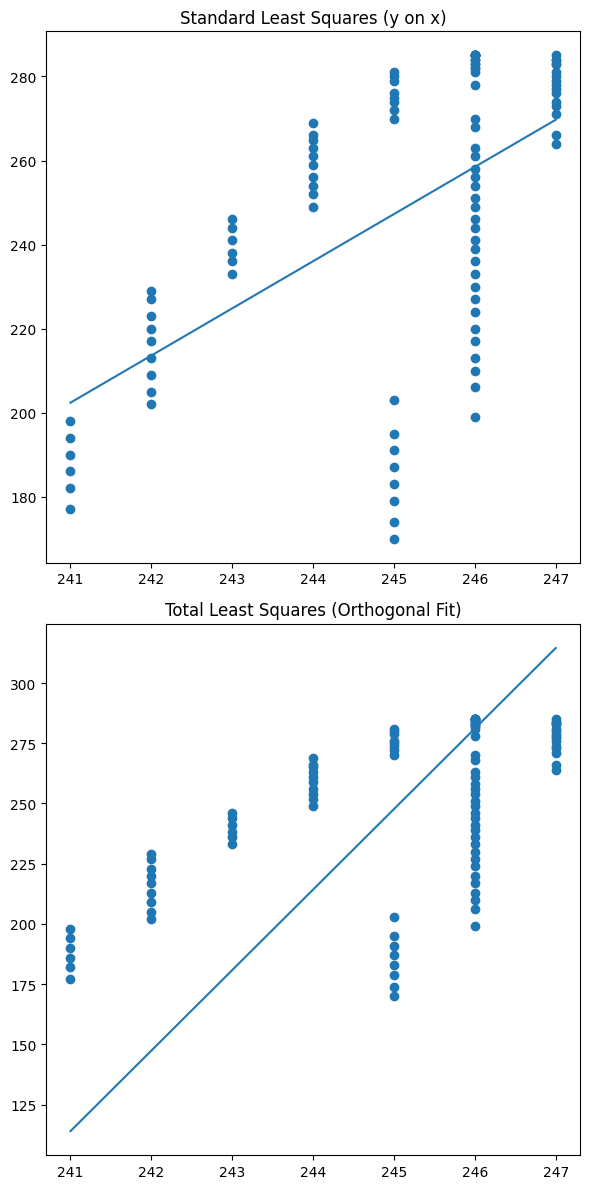

In [39]:
import matplotlib.pyplot as plt

x_line = np.linspace(min(x), max(x), 200)
y_line = np.linspace(min(y), max(y), 200)

fig, axes = plt.subplots(2, 1, figsize=(6, 12))

# Standard LS
axes[0].scatter(x, y)
axes[0].plot(x_line, m * x_line + b)
axes[0].set_title("Standard Least Squares (y on x)")


# TLS
axes[1].scatter(x, y)
axes[1].plot(x_line, m_tls * x_line + b_line_tls)
axes[1].set_title("Total Least Squares (Orthogonal Fit)")

plt.tight_layout()
plt.show()

## Quadratic Curve Fitting Using Least Squares

To model the vertical motion of the yellow ball over time, a **quadratic polynomial** is fitted using the Least Squares method.

A time index variable \( t \) is defined corresponding to each frame:

$$
t = 0, 1, 2, \dots, N-1
$$

The goal is to fit a quadratic model of the form:

$$
y(t) = at^2 + bt + c
$$

---

### Matrix Form

The system is written in matrix form as:

$$
A \theta = y
$$


---

### Least Squares Solution

We want to minimizes the sum of squared residuals:

$$
\sum (y_i - (a t_i^2 + b t_i + c))^2
$$
The optimal parameters are obtained when:

$$
\theta = (A^T A)^{-1} A^T y
$$

---

### Final Model

The resulting quadratic equation is:

$$
y(t) = at^2 + bt + c
$$

This provides a mathematical model of the ball’s vertical trajectory over time, capturing the parabolic motion characteristic of projectile dynamics.

In [40]:
t_vals = np.arange(0, len(frame_center_yellow_y))   # 0 → 101

y_vals = np.array(frame_center_yellow_y)
# Design matrix
A = np.column_stack((t_vals**2, t_vals, np.ones_like(t_vals)))

# Normal equation
theta = np.linalg.inv(A.T @ A) @ (A.T @ y_vals)

a_ls, b_ls, c_ls = theta

print("Standard LS Quadratic:")
print(f"y = {a_ls:.6f} t^2 + {b_ls:.6f} t + {c_ls:.6f}")

Standard LS Quadratic:
y = -0.043751 t^2 + 4.501335 t + 169.227672


## Robust Quadratic Fitting Using RANSAC

To improve robustness against outliers, the quadratic trajectory is estimated using the **RANSAC (Random Sample Consensus)** algorithm.

Instead of using all data points at once, RANSAC repeatedly fits a model using small random subsets and selects the model that best agrees with the majority of the data.

---

### Step 1: Random Sampling

For each iteration:

- Three random data points are selected (minimum required to fit a quadratic).
- A temporary quadratic model is estimated using these points.

The quadratic model has the form:

$$
y(t) = at^2 + bt + c
$$

---

### Step 2: Inlier Detection

The temporary model is used to predict all data points.  
The residual error is computed as:

$$
\text{error}_i = |y_i - \hat{y}_i|
$$

Points whose error is below a predefined threshold (pixel tolerance) are considered **inliers**.

The model that produces the largest number of inliers is selected as the best candidate.

---

### Step 3: Final Model Estimation

After identifying the best inlier set, the quadratic model is recomputed using only those inliers:

$$
\theta = (A^T A)^{-1} A^T y
$$

This produces the final robust quadratic:

$$
y(t) = a_r t^2 + b_r t + c_r
$$

---

### Interpretation

RANSAC reduces the influence of outliers by fitting the model only to consistent data points.  
This results in a more reliable estimate of the ball’s trajectory, especially when noisy detections or tracking errors are present.

In [41]:
import random

iterations = 300
threshold = 2   # pixel tolerance
best_inliers = []

for _ in range(iterations):

    # Random 3 indices
    idx = np.random.choice(len(t_vals), 3, replace=False)

    A_sample = np.column_stack((t_vals[idx]**2,
                                t_vals[idx],
                                np.ones(3)))
    y_sample = y_vals[idx]

    # Solve for sample model
    theta_sample = np.linalg.inv(A_sample.T @ A_sample) @ (A_sample.T @ y_sample)

    # Predict all points
    y_pred = A @ theta_sample

    # Compute residuals
    errors = np.abs(y_vals - y_pred)

    inliers = np.where(errors < threshold)[0]

    if len(inliers) > len(best_inliers):
        best_inliers = inliers

# Refit using best inliers
A_in = A[best_inliers]
y_in = y_vals[best_inliers]

theta_ransac = np.linalg.inv(A_in.T @ A_in) @ (A_in.T @ y_in)

a_r, b_r, c_r = theta_ransac

print("\nRANSAC Quadratic:")
print(f"y = {a_r:.6f} t^2 + {b_r:.6f} t + {c_r:.6f}")


RANSAC Quadratic:
y = -0.043751 t^2 + 4.501335 t + 169.227672


## Visualization of Standard Least Squares and RANSAC Quadratic Fit

After computing both the Standard Least Squares (LS) quadratic model and the RANSAC-based quadratic model, the results are visualized for comparison.

A smooth range of time values \( t \) is generated to draw continuous curves representing each fitted model.

Two side-by-side subplots are created to clearly compare their behavior.

---

### Standard Least Squares (LS)

The first subplot displays:

- The observed trajectory points (scatter plot)
- The quadratic curve:

$$
y(t) = a_{LS}t^2 + b_{LS}t + c_{LS}
$$

This model minimizes the total squared residual error:

$$
\sum (y_i - \hat{y}_i)^2
$$

All data points contribute equally to the fit, including potential outliers.

---

### RANSAC Quadratic Fit

The second subplot displays:

- The same observed trajectory points
- The robust quadratic curve:

$$
y(t) = a_R t^2 + b_R t + c_R
$$

RANSAC estimates the model using only consistent inliers, reducing the influence of outliers and noisy detections.

---

### Interpretation

## The visualization:

- **Least Squares**
- **RANSAC**
## Why not use TLS?
Because TLS assumes noise in both x and y variables, but the frame index t is exact. Using TLS would incorrectly model noise in t and may degrade the fit.
## Advantage of RANSAC
Only if the dataset contains outliers (mistracked frames, misdetections). If the dataset contains only Gaussian noise in y, Standard LS is more efficient and RANSAC offers no major benefit.

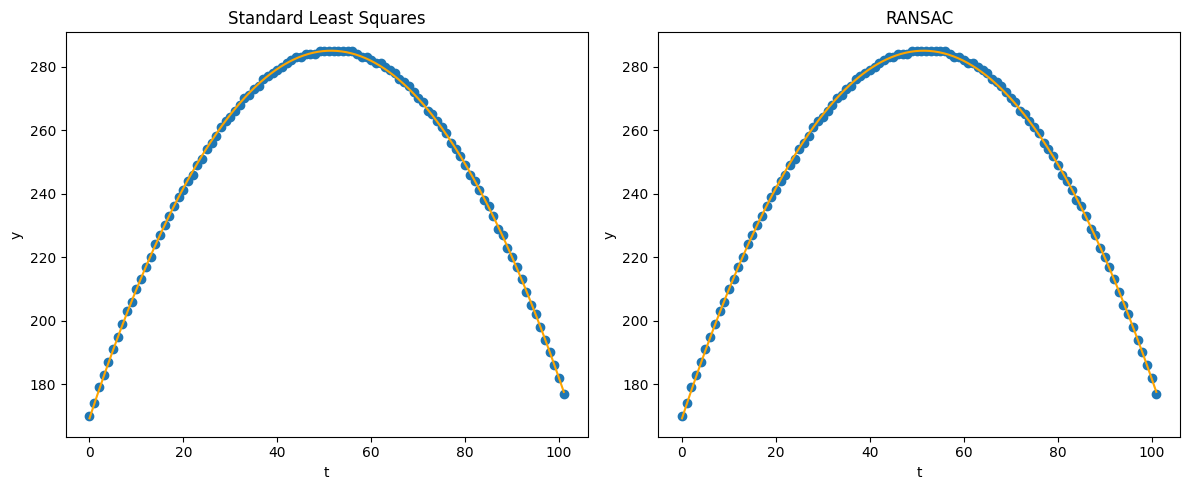

In [42]:
import matplotlib.pyplot as plt
import numpy as np

t_line = np.linspace(min(t_vals), max(t_vals), 300)

y_ls_line = a_ls*t_line**2 + b_ls*t_line + c_ls
y_r_line = a_r*t_line**2 + b_r*t_line + c_r

fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Standard LS
axs[0].scatter(t_vals, y_vals)
axs[0].plot(t_line, y_ls_line, color='orange')
axs[0].set_title("Standard Least Squares")
axs[0].set_xlabel("t")
axs[0].set_ylabel("y")

# RANSAC
axs[1].scatter(t_vals, y_vals)
axs[1].plot(t_line, y_r_line, color='orange')
axs[1].set_title("RANSAC")
axs[1].set_xlabel("t")
axs[1].set_ylabel("y")

plt.tight_layout()
plt.show()

## Prediction Using Standard LS and Total LS Models

After estimating both the Standard Least Squares (LS) and Total Least Squares (TLS) lines, a prediction is performed for a specific x-value.

Given:

$$
x = 59.2
$$

the corresponding y-value is computed using each fitted model.

---

### Standard Least Squares Prediction

Using the linear model:

$$
y = m_1 x + b_1
$$

the predicted value is:

$$
y_{LS} = m_1(59.2) + b_1
$$

This prediction is based on minimizing vertical residual errors.

---

### Total Least Squares Prediction

Using the TLS model:

$$
y = m_{TLS} x + b_{TLS}
$$

the predicted value is:

$$
y_{TLS} = m_{TLS}(59.2) + b_{TLS}
$$

Since TLS minimizes perpendicular distances, the predicted value may differ slightly from the Standard LS estimate.

---

### Interpretation

Comparing these two predictions highlights how different fitting criteria (vertical vs. orthogonal error minimization) can influence the estimated trajectory value at a given point.

In [43]:
x_value = 59.2

y_standard = m * x_value + b

print("Standard LS prediction:")
print(f"For x = {x_value}, y = {y_standard:.4f}")

y_tls = m_tls * x_value + b_line_tls

print("\nTotal LS prediction:")
print(f"For x = {x_value}, y = {y_tls:.4f}")

Standard LS prediction:
For x = 59.2, y = -1838.2679

Total LS prediction:
For x = 59.2, y = -5961.5640
